In [112]:
#Library Imports
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import datetime
import time

font = {'family' : 'helvetica',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [61]:
#CSV Import
dex_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/dex_data.csv', low_memory=False)
stable_df = pd.read_csv('https://raw.githubusercontent.com/keroshanpillay/Stablecoin-Data-Project/master/Final_Data/stable_onchain_data_2021_July2022.csv', low_memory = False)
stable_df = stable_df.sort_values(by=["date"])

In [5]:
#Data Points to plot
# - Velocity[], TVL[ ], utilization[ ], supply[X]
# MC = T/V -> V = T/MC

In [177]:
C = 1 #Stablecoin assumed to be $1
T = stable_df['Vol (Native)']
M = stable_df['supply_ntv'] #Monetary supply
stable_df['velocity'] = stable_df['Vol (Native)']/stable_df['supply_ntv']

In [162]:
stable_df

,# TXs,Agg. # TXs,Unique Senders,Unique Receivers,Unique Users,Vol (Native),Agg. Vol (Native),Mints (Native),Burns (Native),Supply (Native),token,date,chain,supply_ntv,velocity
13848,339.0,339.0,99.0,101.0,114.0,2.807153e+06,2.807153e+06,3.234735e+05,-4.472261e+05,-1.237526e+05,UST,2021-01-01,ethereum,3.861025e+07,8.780052e-06
8077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,USDC,2021-01-01,avalanche,NaN,NaN
1153,458.0,458.0,49.0,53.0,60.0,9.855003e+04,9.855003e+04,2.110000e+03,-4.865931e+02,1.623407e+03,DAI,2021-01-01,polygon,1.623407e+03,2.821227e-01
2488,2204.0,2204.0,361.0,346.0,387.0,7.401385e-06,7.401385e-06,1.319326e-06,-3.445669e-08,1.284869e-06,USDC,2021-01-01,polygon,1.284869e-06,1.715350e+09
7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,USDC.e,2021-01-01,avalanche,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,242.0,397957.0,121.0,129.0,167.0,2.045027e+07,6.343403e+10,1.190464e+06,-6.126110e+05,5.723097e+08,TUSD,2022-07-31,ethereum,7.243266e+08,3.341034e-07
12298,53228.0,10862451.0,18608.0,20050.0,27023.0,7.971286e+09,2.101543e+12,4.679903e+07,-6.965203e+07,7.825803e+09,USDC,2022-07-31,ethereum,3.898391e+10,1.365384e-06
13272,223.0,718725.0,81.0,104.0,135.0,4.510553e+06,1.120830e+11,2.628478e+05,-2.528377e+05,3.986949e+08,UST,2022-07-31,ethereum,2.005387e+07,1.112005e-05
6924,12609.0,25320.0,2166.0,2287.0,2878.0,2.719100e+07,6.944544e+07,4.893366e+05,-2.020117e+06,5.174186e+05,USDC.e,2022-07-31,avalanche,5.174186e+05,2.436905e-02


In [199]:
def plot_by_token(metric,ylim=None):
    Tot = 3
    Cols = 1

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(22,30))

    chains = ['avalanche','ethereum','polygon']
    #metric = 'supply_ntv'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df.set_index('date', inplace = True)
        temp_df = temp_df.groupby('token')[metric]
        ax = temp_df.plot(ax=fig.add_subplot(Rows,Cols,Position[k]),legend=True)
        plt.xlabel('Date')
        plt.ylabel(metric)
        plt.title(curr_chain + ' ' + metric)
        plt.grid()
        plt.ylim(ylim)
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


In [164]:
def plot_agg(metric):
    Tot = 3
    Cols = 1

    Rows = Tot // Cols 

    if Tot % Cols != 0:
        Rows += 1

    Position = range(1,Tot + 1)

    fig = plt.figure(1,figsize=(22,30))

    chains = ['avalanche','ethereum','polygon']
    #metric = '# TXs'

    for k in range(Tot):

      # add every single subplot to the figure with a for loop
        curr_chain = chains[k]
        #fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))
        temp_df = stable_df[stable_df['chain']==curr_chain]
        temp_df = temp_df[['date',metric]].groupby('date').agg(['sum']).reset_index()
        ax = temp_df.plot(x = 'date', y=metric,ax=fig.add_subplot(Rows,Cols,Position[k]))
        ax.set_xlabel('Date')
        ax.set_ylabel(metric)
        ax.set_title(curr_chain + ' ' + metric)
        ax.grid()
        #ax.set_xlim('2022-05-06','2022-06-01')
    plt.show()


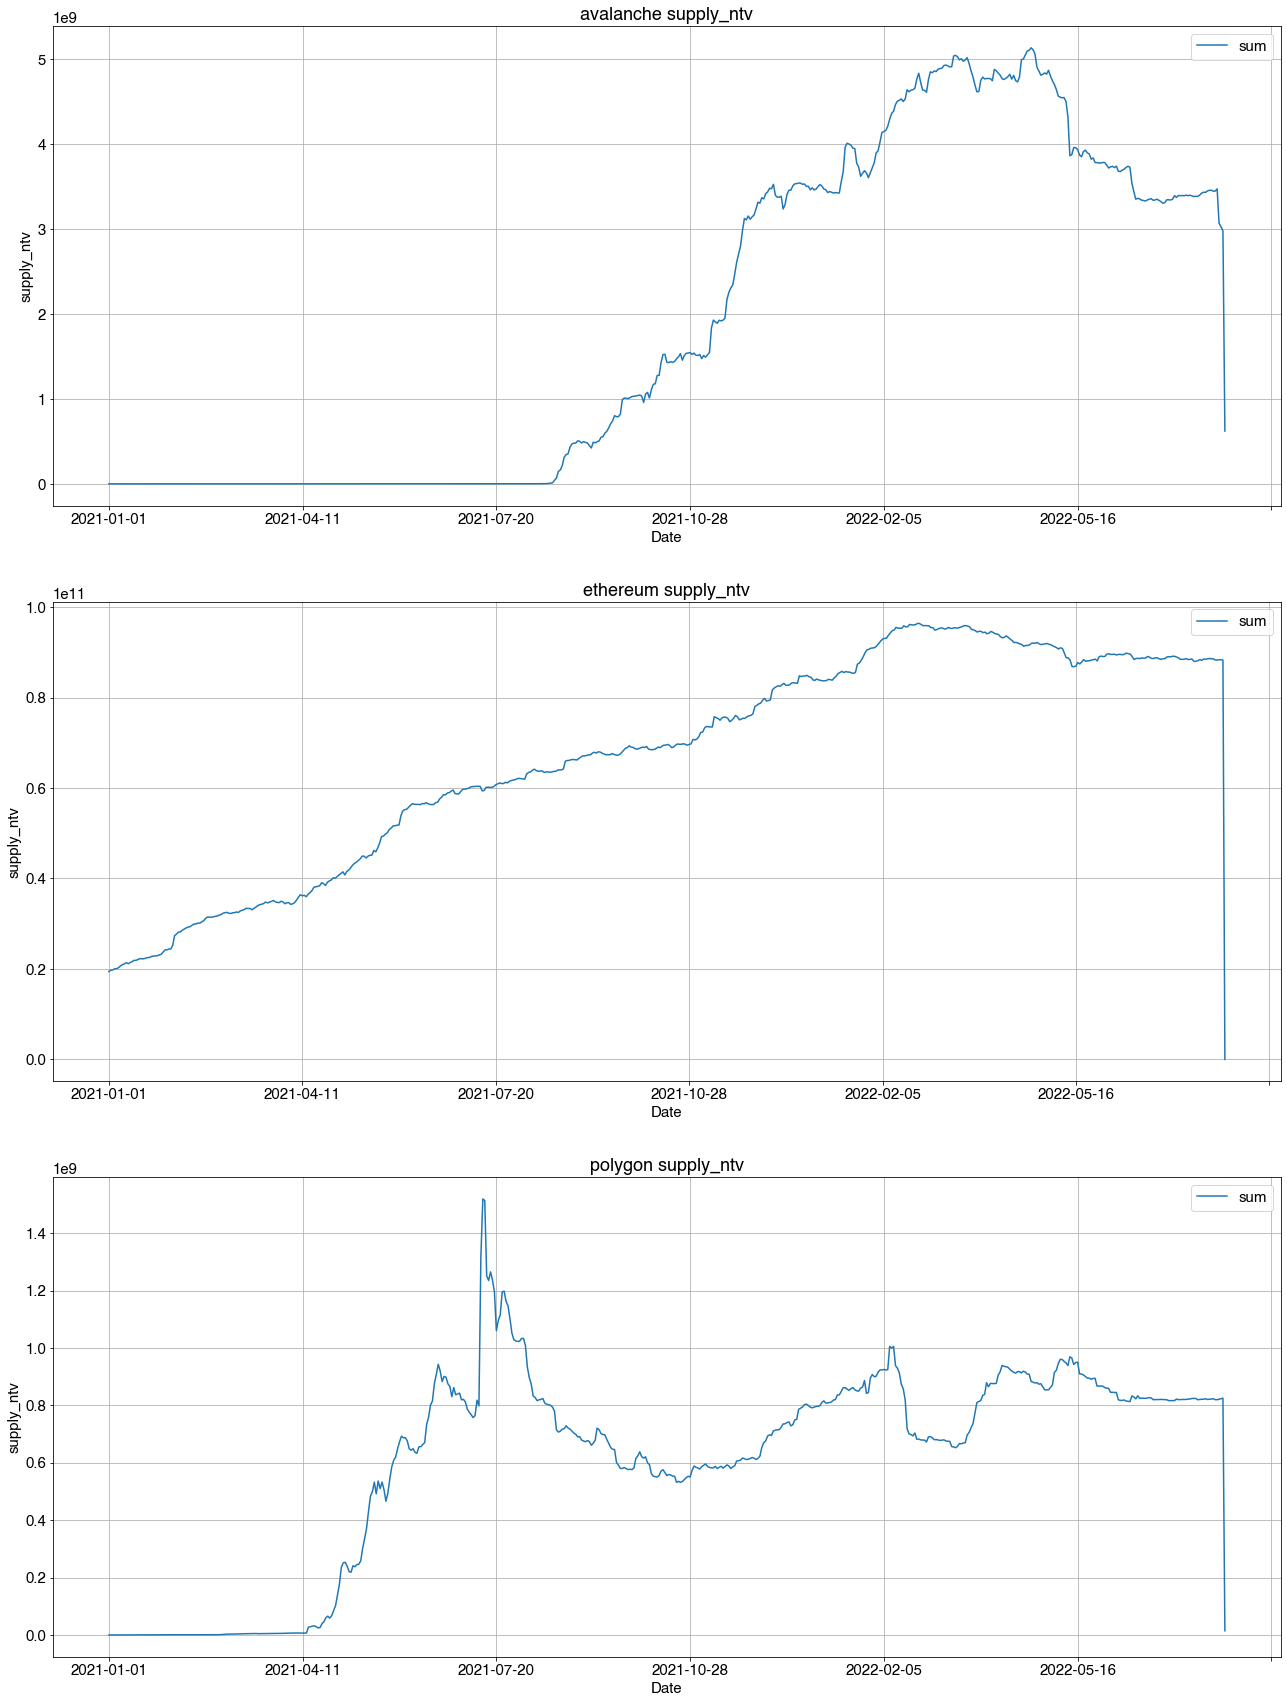

In [168]:
plot_agg('supply_ntv')

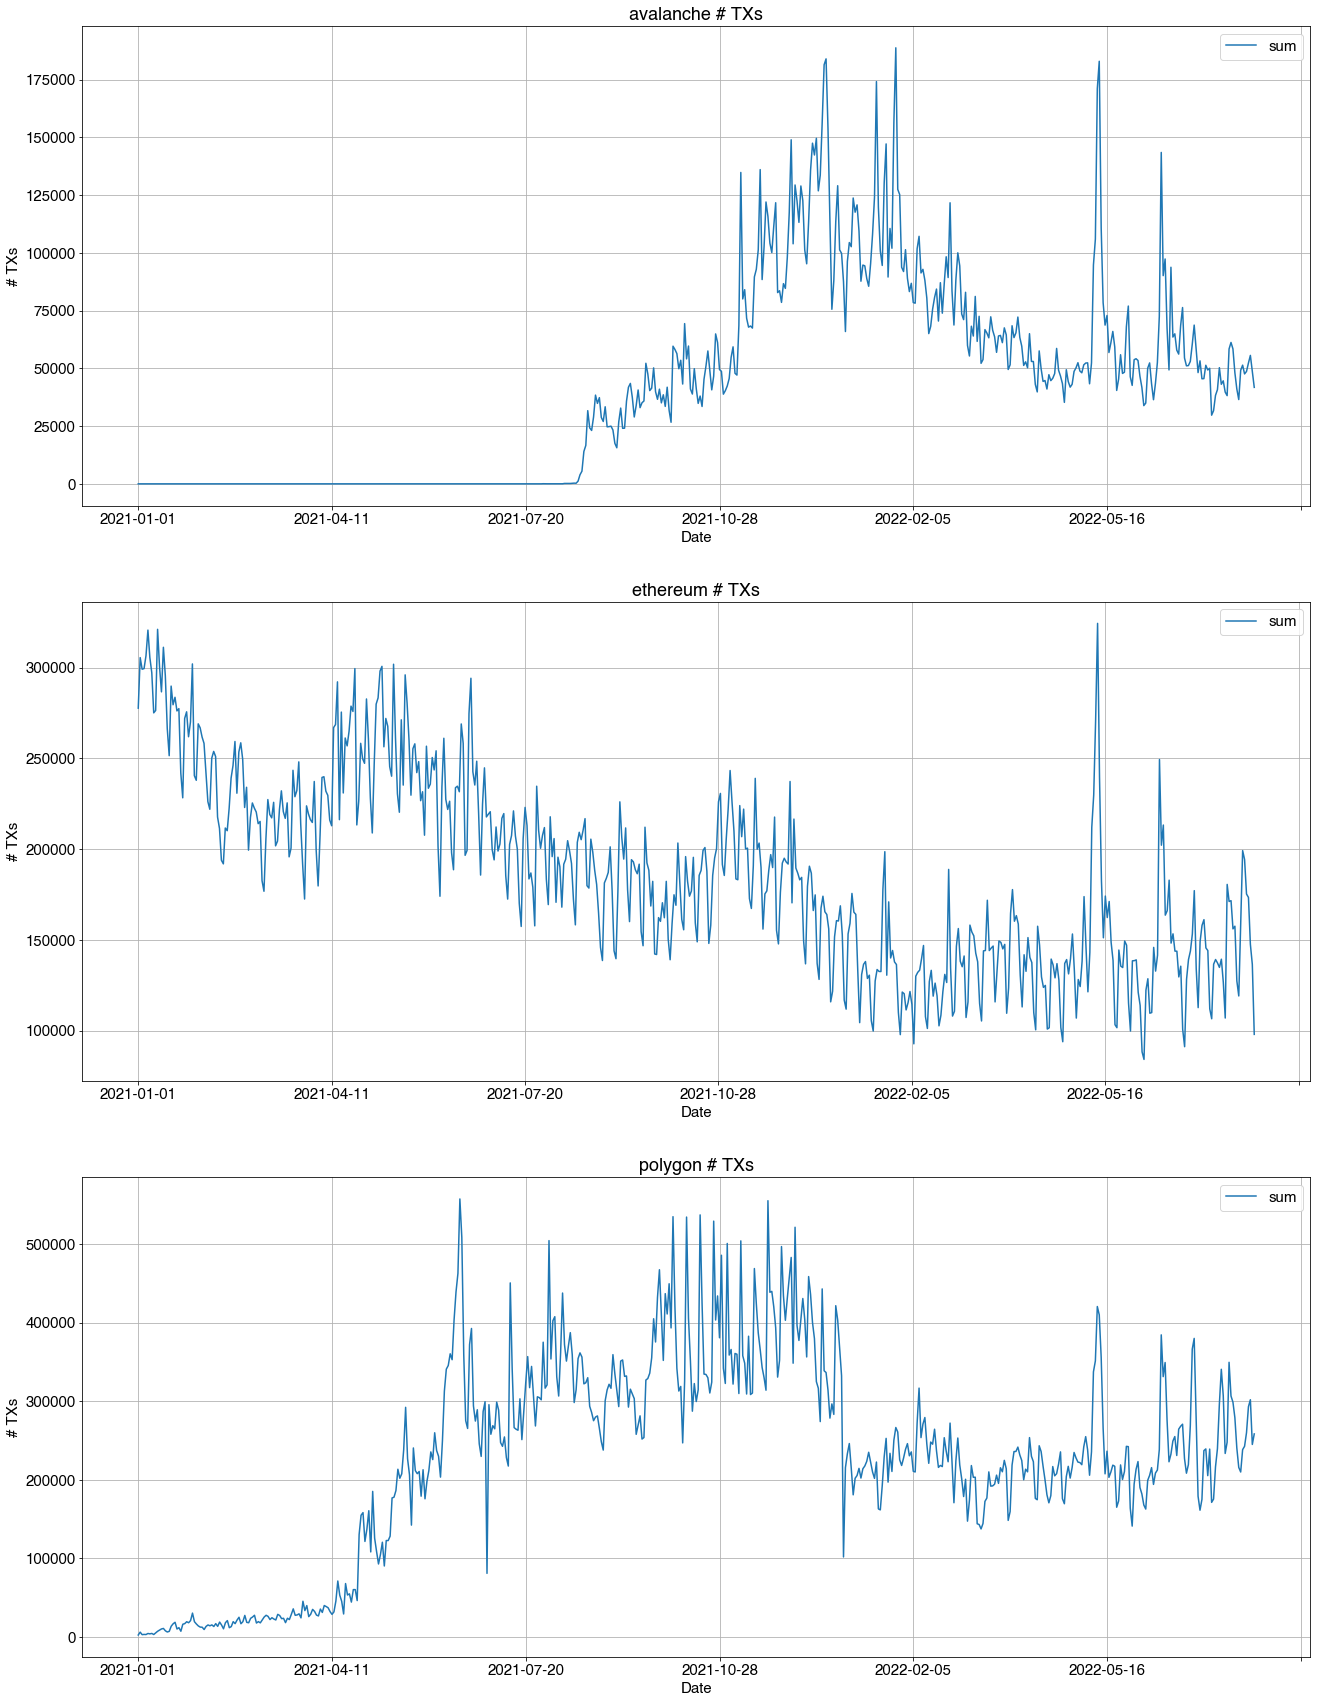

In [165]:
plot_agg('# TXs')

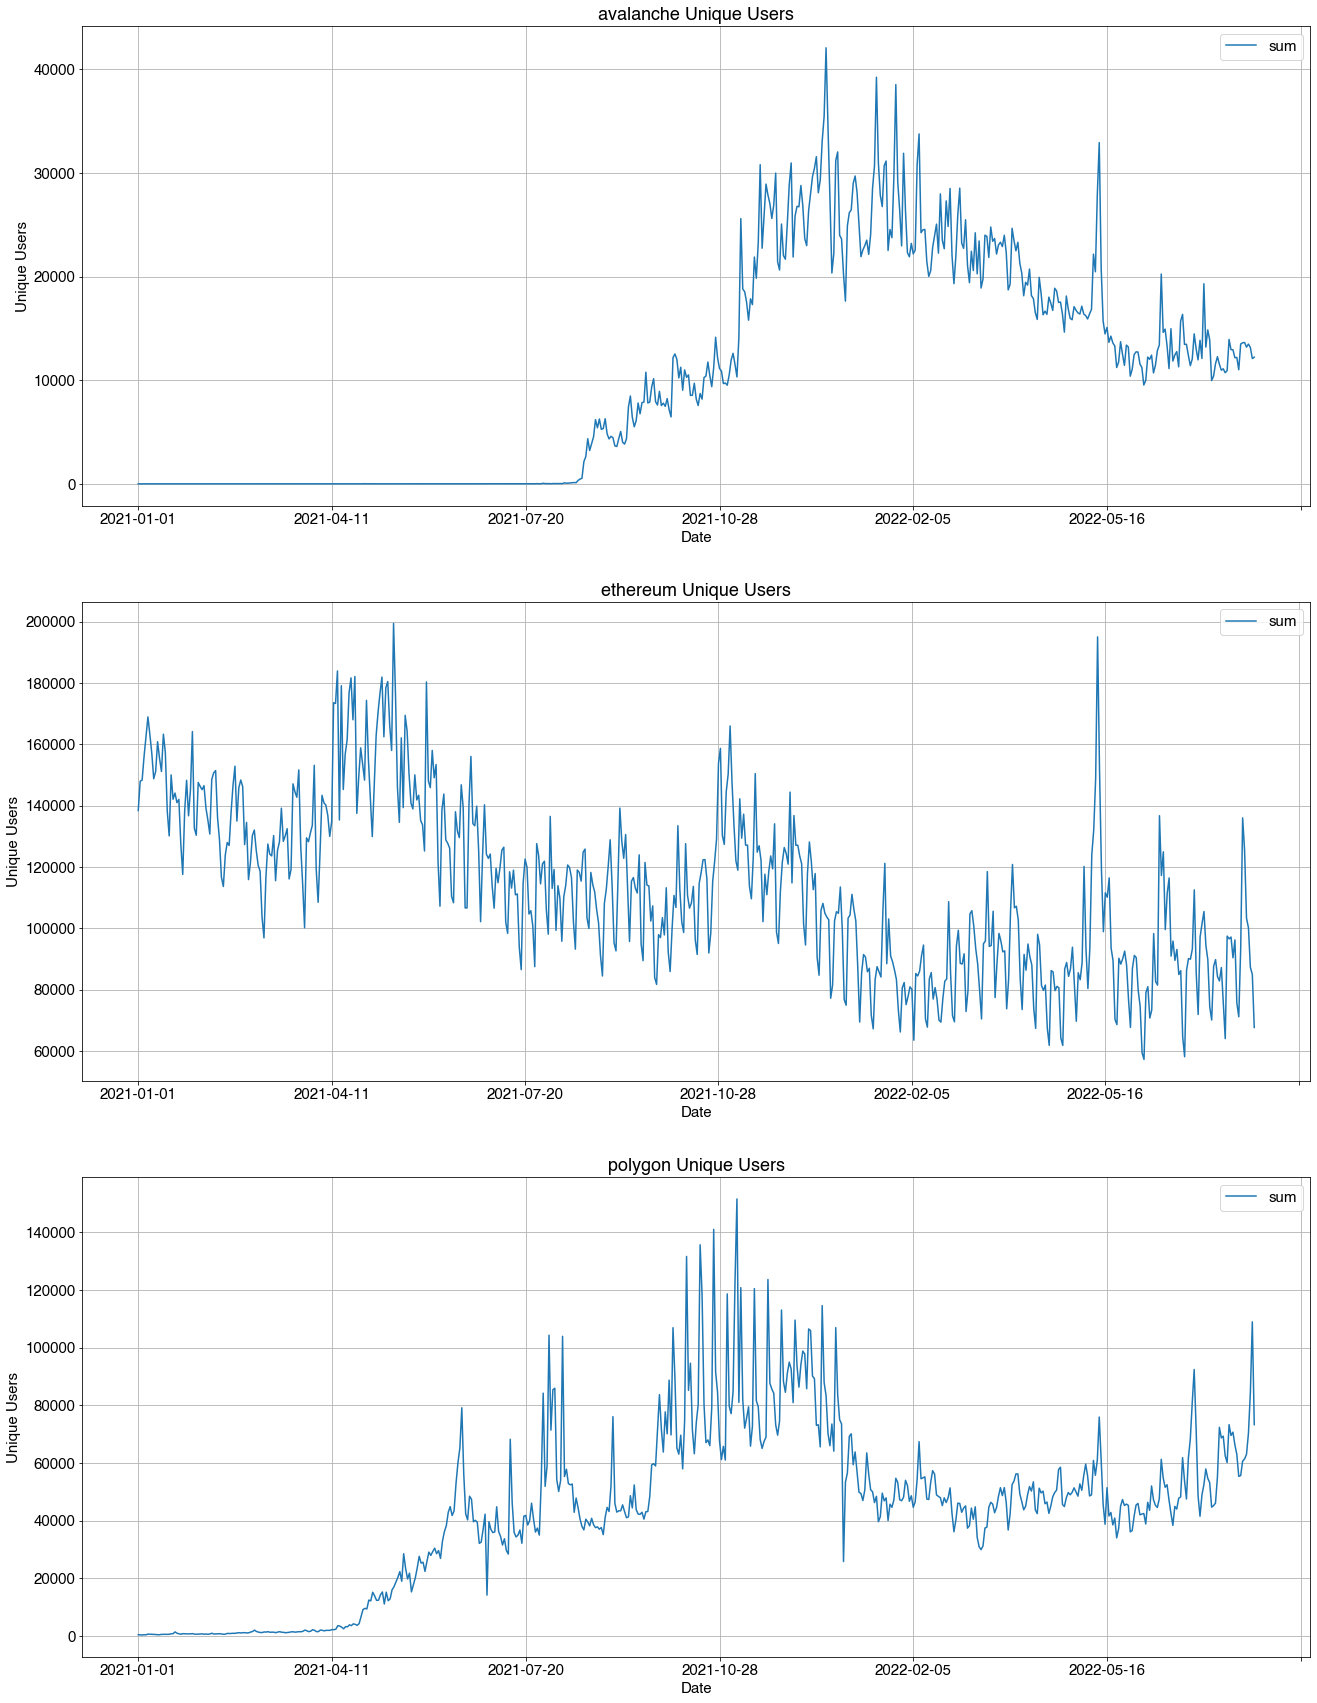

In [166]:
plot_agg('Unique Users')

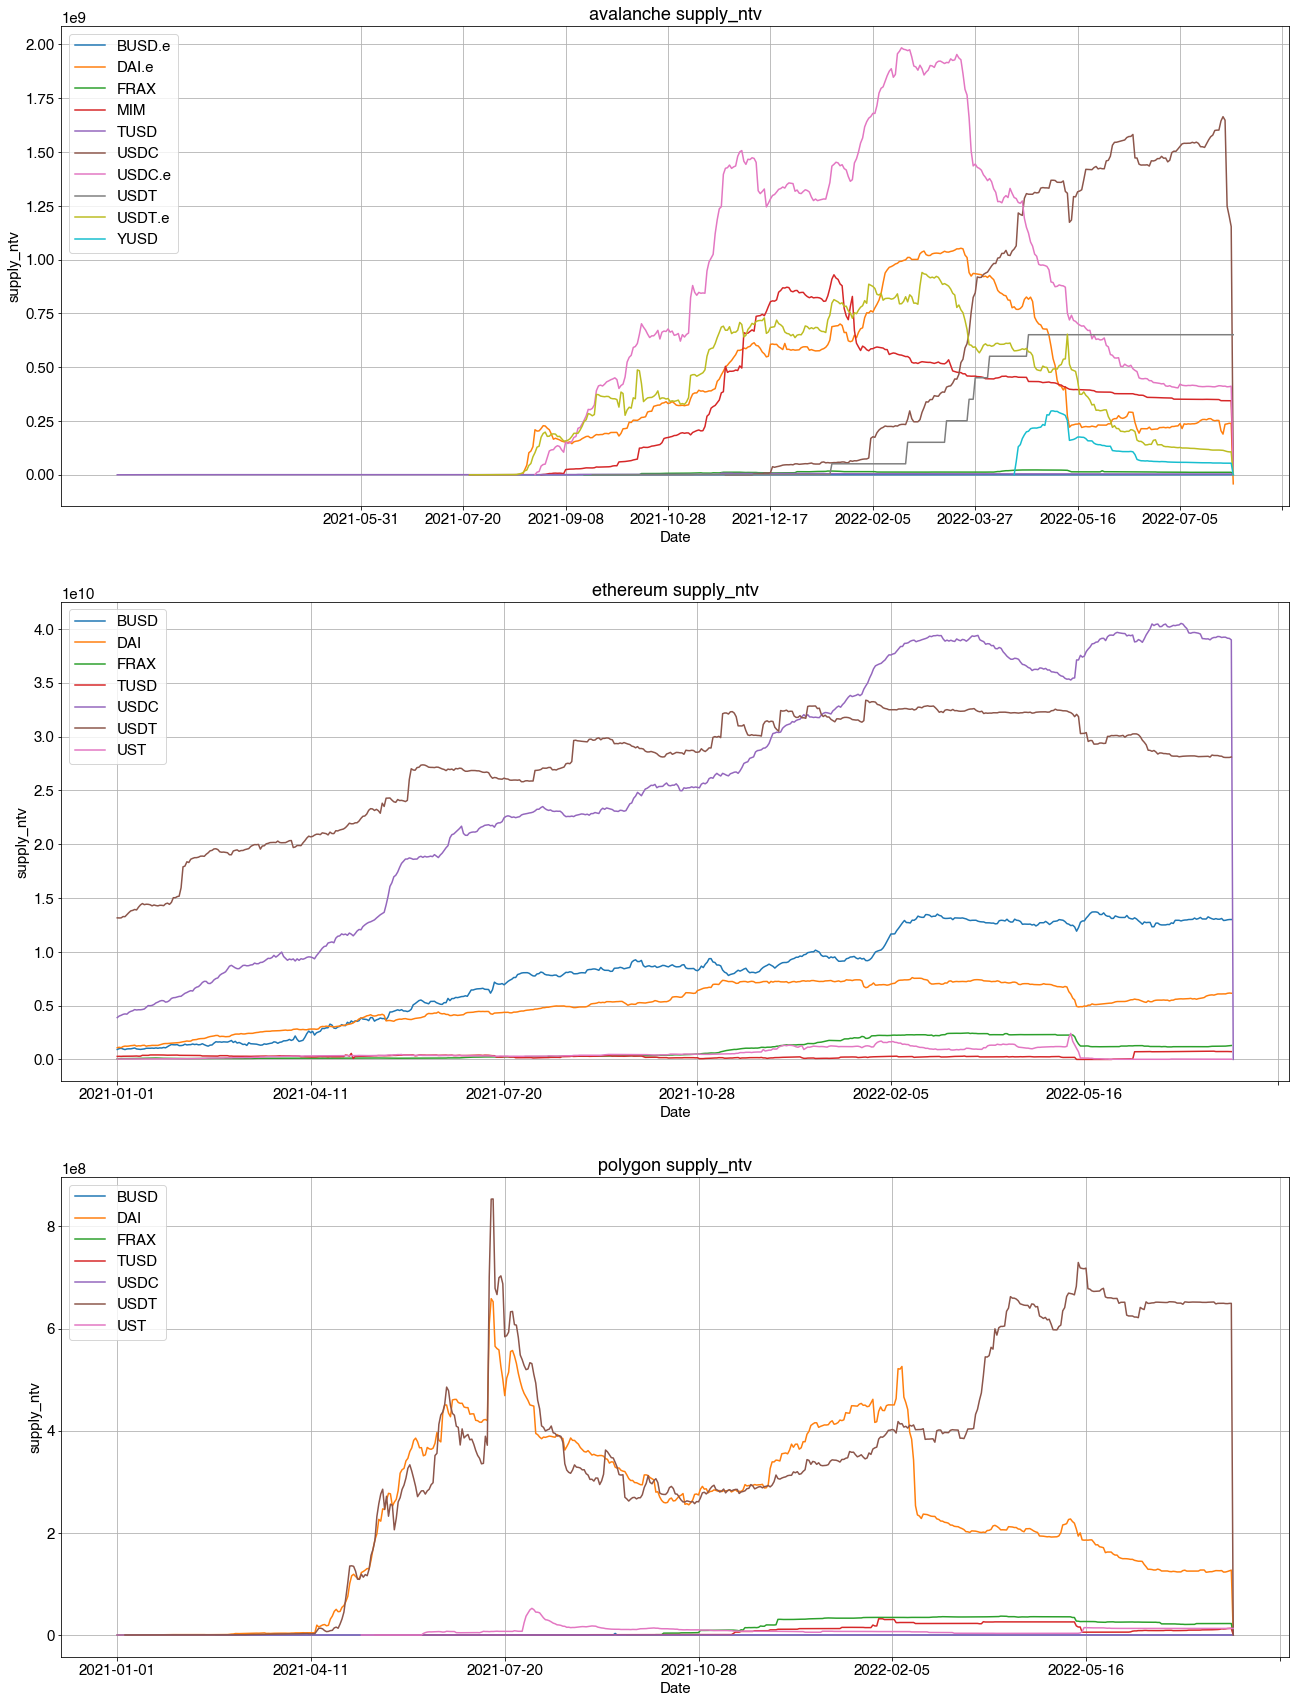

In [181]:
plot_by_token('supply_ntv')

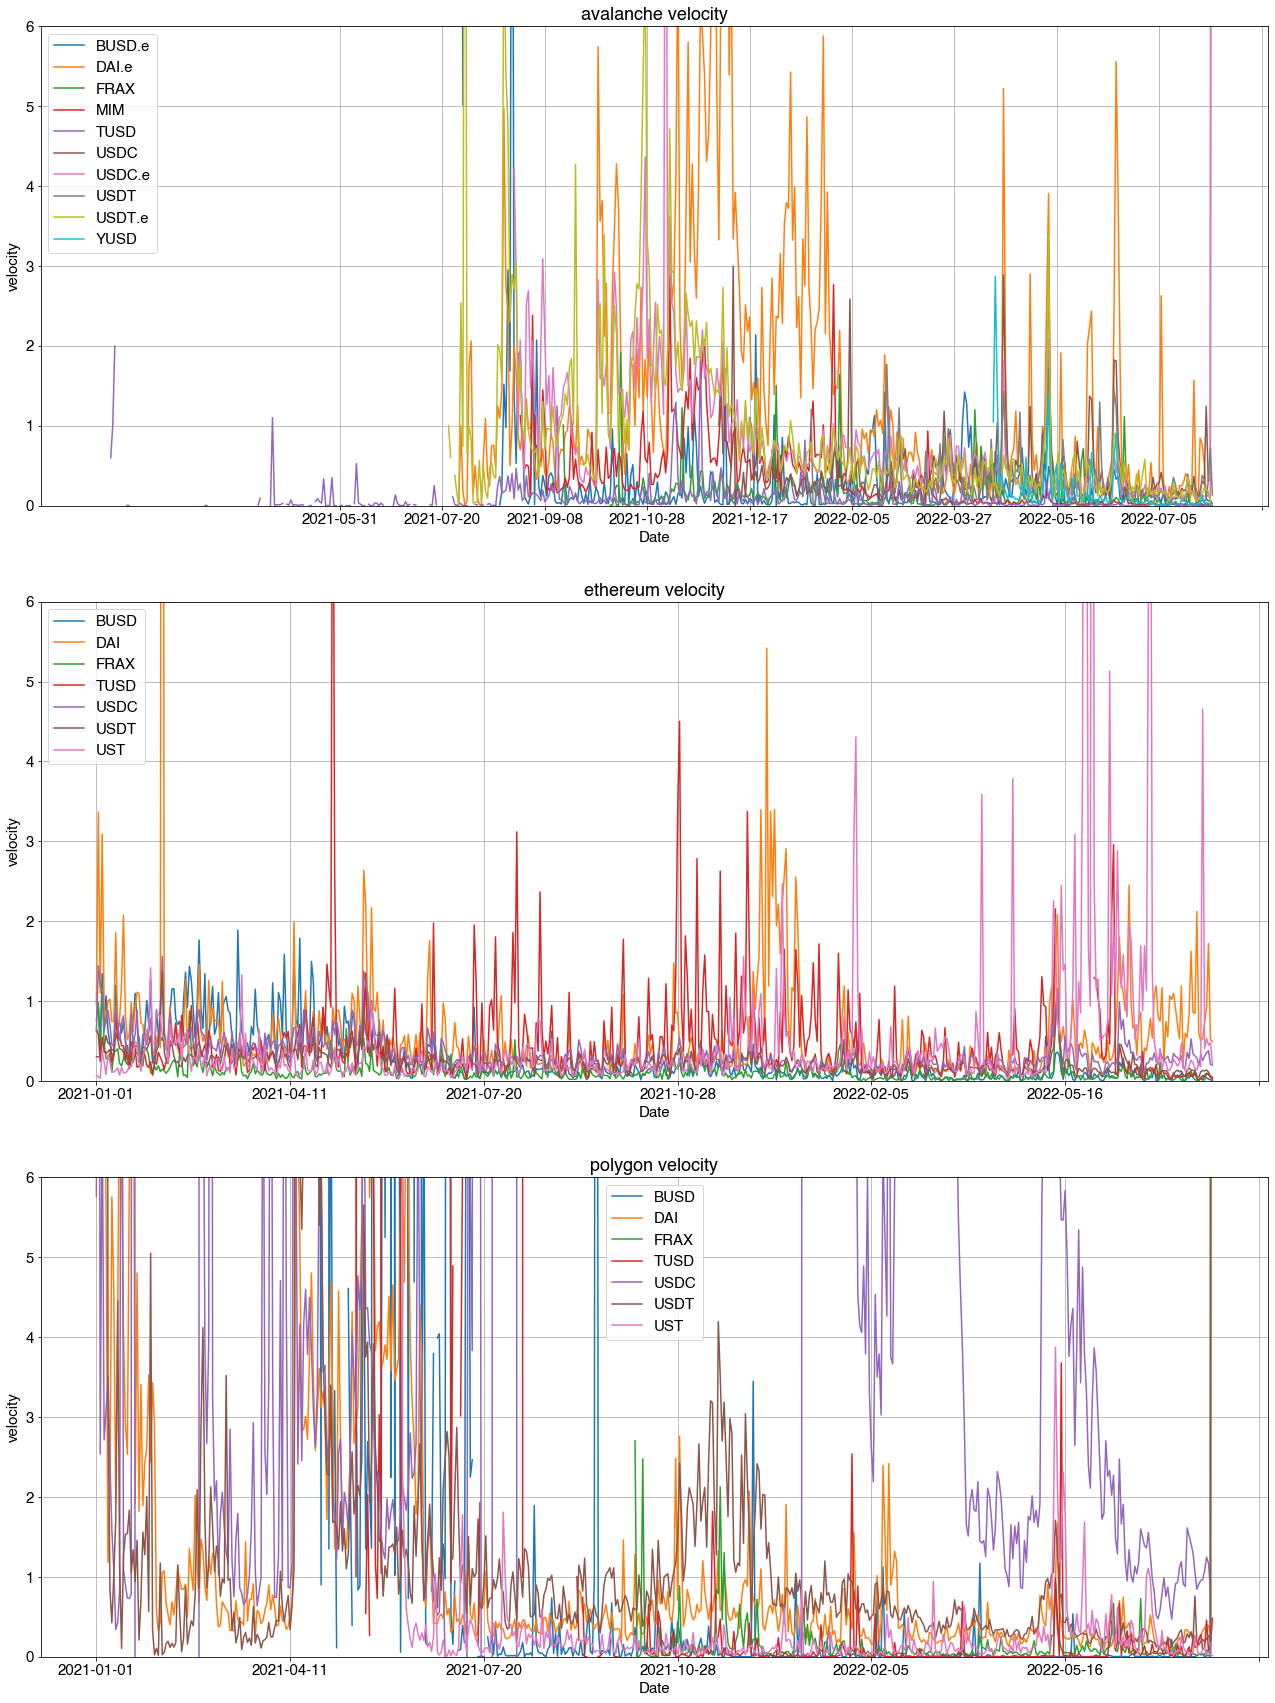

In [201]:
plot_by_token('velocity',[0,6])